# Module One Problem Set: Multiple Regression

In this notebook, you have been given a set of steps that will show you how to create a multiple regression model in R. It is very important to run the steps in order. Some steps depend on the outputs of earlier steps. Once you have run all the steps, you will be asked to create your own multiple regression model to help you answer the questions in the Module One Problem Set. You are expected to write the R script yourself to answer these questions.

Reminder: If you have not already reviewed the Problem Set Report template for your Module One Problem Set, be sure to do so now. That will give you an idea of the questions you will need to answer with the outputs of this script. You should use the code you are given as reference when writing your own scripts.

### Step 1: Loading the Data Set
You are an analyst working for a car maker. You have access to a set of data that can be used to study the fuel economy of a car. Car makers are interested in studying factors that are associated with better fuel economy. This data set includes several important variables that are associated with fuel economy. You will use this data set to create models to predict fuel economy.

This block of R code will load the data set from **mtcars.csv** file. Here are the variables contained in the dataset. 

| <div style="text-align: left"> Variable </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="text-align: left"> mpg </div> | <div style="text-align: left"> Fuel economy in miles/(US) gallon </div> |
| <div style="text-align: left"> cyl </div> | <div style="text-align: left"> Number of cylinders in car's engine. Values are (4, 6, 8) </div> |
| <div style="text-align: left"> disp </div> | <div style="text-align: left"> Displacement (cu.in.) measures overall volume in the engine as a factor of cylinder circumfrance, depth and total number of cylinders. This metric is a good proxy for the total amount of power the engine can generate.</div> |
| <div style="text-align: left"> hp </div> | <div style="text-align: left"> Gross horsepower measures the theoretical output of an engine’s power output.</div> |
| <div style="text-align: left"> drat </div> | <div style="text-align: left"> Rear axle ratio indicates the number of turns of the drive shaft for every one rotation of the wheel axle. A vehicle with a high ratio would provide more torque. </div> |
| <div style="text-align: left"> wt </div> | <div style="text-align: left"> Weight of the car per 1,000 lbs. </div>|
| <div style="text-align: left"> qsec </div> | <div style="text-align: left"> Quarter mile time is a performance measure of acceleration of the car.</div>|
| <div style="text-align: left"> vs </div> | <div style="text-align: left"> Engine's cylinder configuration as V-shaped or straight. Configuration offers trade offs in power/torque, design usage in terms of space/size of engine and performance or center of gravity of vehicle. Values are (0 = V-shaped, 1 = straight) </div> |
| <div style="text-align: left"> am </div> | <div style="text-align: left"> Automatic or Manual transmission. Values are (0 = automatic, 1 = manual) </div> |
| <div style="text-align: left"> gear </div> | <div style="text-align: left"> Number of gears in the transmission.</div> |

Reference:
R data sets. (1974). <i>Motor trend car road tests<i> [Data file]. Retrieved from https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars


Click the code section below and hit the **Run** button above.

In [1]:
# Loading mtcars data set from a mtcars.csv file
mtcars <- read.csv(file='mtcars.csv', header=TRUE, sep=",")

# Converting appropriate variables to factors  
mtcars2 <- within(mtcars, {
   vs <- factor(vs)
   am <- factor(am)
   cyl  <- factor(cyl)
   gear <- factor(gear)
   carb <- factor(carb)
})

# Variables and their type
print("Variables")
sapply(mtcars2, class)


# Print the data set
print("dataset")
mtcars2


# Print the first 10 rows
print("head")
head(mtcars2, 10)

[1] "Variables"


car       mpg       cyl      disp        hp      drat        wt      qsec 
 "factor" "numeric"  "factor" "numeric" "integer" "numeric" "numeric" "numeric" 
       vs        am      gear      carb 
 "factor"  "factor"  "factor"  "factor"

[1] "dataset"


car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<fct>,<dbl>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


[1] "head"


car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<fct>,<dbl>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


## Step 2: Basic Information on the Data Set
In this step, you will use some R functions to obtain basic information on the data set. This includes obtaining the column (variable) names, the total number of variables, and the total number of rows. 

Click the code section below and hit the **Run** button above.

In [2]:
# This prints the column names
print("names")
names(mtcars2)

# Another function that prints the column names
print("colnames")
colnames(mtcars2)

# Total number of columns in the data set
print("ncol")
ncol(mtcars2)

# Total number of rows in the data set
print("nrow")
nrow(mtcars2)

[1] "names"


[1] "car"  "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"  
[11] "gear" "carb"

[1] "colnames"


[1] "car"  "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"  
[11] "gear" "carb"

[1] "ncol"


[1] 12

[1] "nrow"


[1] 32

## Step 3: Histogram
In this step, you will use the **hist** function in R to print the histogram for the variable **mpg** in the data set.  


Click the block of code below and hit the **Run** button above.  
NOTE: If the plot is not created, click the code section and hit the **Run** button again.

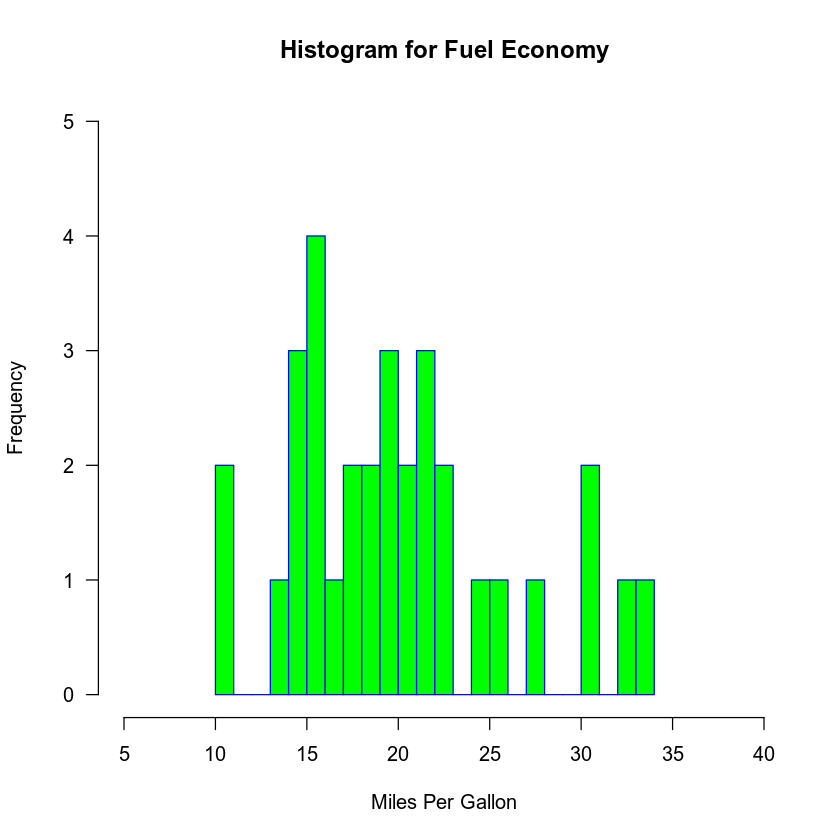

In [3]:
hist(mtcars2$mpg, 
     main="Histogram for Fuel Economy", 
     xlab="Miles Per Gallon", 
     border="blue", 
     col="green",
     xlim=c(5,40),
     ylim=c(0,5),
     las=1, 
     breaks=20)

## Step 4: Scatterplot
In this step, you will use the **plot** function in R to print the scatterplot for the variables **mpg** and **wt** in the data set.  


Click the block of code below and hit the **Run** button above.  
NOTE: If the plot is not created, click the code section and hit the **Run** button again.

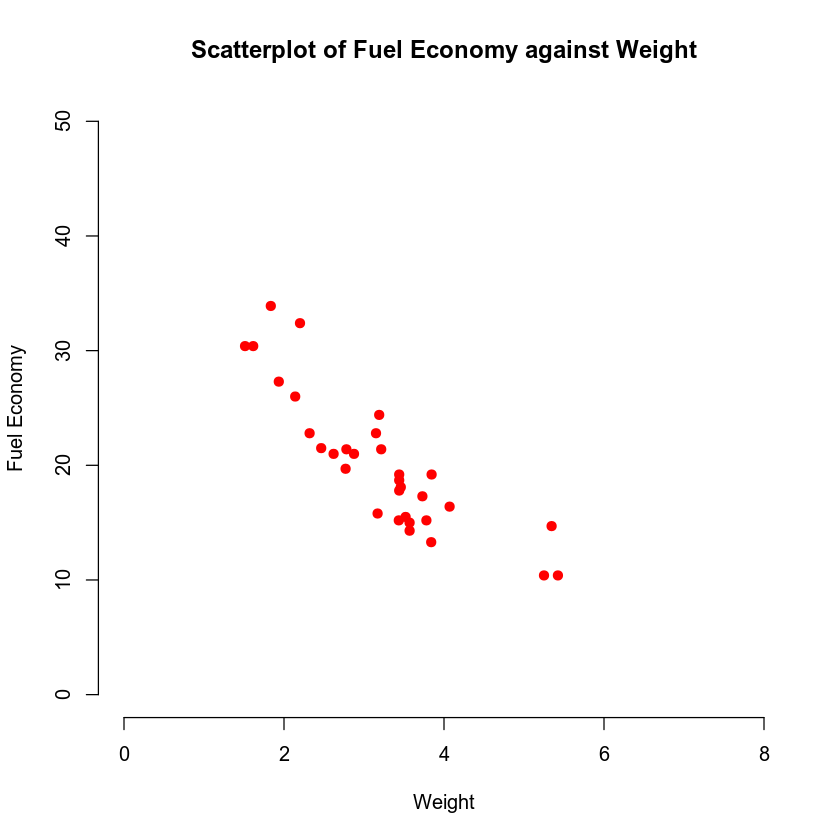

In [4]:
plot(mtcars2$wt, mtcars$mpg, 
     main = "Scatterplot of Fuel Economy against Weight",
     xlab = "Weight", ylab = "Fuel Economy",
     xlim=c(0, 8),
     ylim=c(0, 50),
     col="red", 
     pch = 19, frame = FALSE)

## Step 5: Subsetting Data and Correlation Matrix
In this step, you will create a subset of the original data set to select some variables. Then, you will print the correlation matrix for the selected variables.

Click the block of code below and hit the **Run** button above.  

In [5]:
# Selecting mpg, wt, and qsec variables to subset the data
myvars <- c("mpg","wt","qsec")
mtcars_subset <- mtcars2[myvars]

# Print the first 10 rows
print("head")
head(mtcars_subset, 10)

# Print the correlation matrix
print("cor")
corr_matrix <- cor(mtcars_subset, method = "pearson")
round(corr_matrix, 4)

[1] "head"


mpg,wt,qsec
<dbl>,<dbl>,<dbl>
21.0,2.620,16.46
21.0,2.875,17.02
22.8,2.320,18.61
21.4,3.215,19.44
18.7,3.440,17.02
18.1,3.460,20.22
14.3,3.570,15.84
24.4,3.190,20.00
22.8,3.150,22.90


[1] "cor"


,mpg,wt,qsec
mpg,1.0000,-0.8677,0.4187
wt,-0.8677,1.0000,-0.1747
qsec,0.4187,-0.1747,1.0000


## Step 6: Multiple Regression
In this step, you will create a multiple regression model for fuel economy as the response variable, and weight and quarter mile time as predictor variables. You will print summary statistics of this model that will help evaluate the significance and utility of the model. 

The general form of this regression model is:


<br><br>
\begin{equation*}
\large E(y) = {\beta}_0\ +\ {\beta}_1\ {x}_1\ +\ {\beta}_2\ {x}_2
\end{equation*}
<br><br>

The prediction regression model equation is:

<br><br>
\begin{equation*}
\large \hat{y} = \hat{{\beta}_0} +\ \hat{{\beta}_1}\ {x}_1\ +\ \hat{{\beta}_2}\ {x}_2
\end{equation*}
<br><br>

\begin{equation*}
\text{where } \hat{y} \text{ is the predicted value of the fuel economy,}\ {x}_1\ \text{is weight,}\ {x}_2\ \text{is quarter mile time}
\end{equation*}

\begin{equation*}
\hat{{\beta}_0} \text{,} \hspace{0.25cm} \hat{{\beta}_1} \text{, } \hspace{0.25cm} \hat{{\beta}_2} \text{  } \text{ are estimates of}
\text{  } {\beta}_0\ \text{,} \hspace{0.25cm} {\beta}_1\ \text{,} \hspace{0.25cm} {\beta}_2\ \text{ respectively  }
\end{equation*}
<br><br>

Click the block of code below and hit the **Run** button above.  

In [6]:
# Create the multiple regression model and print the statistics
model <- lm(mpg ~ wt + qsec, data=mtcars_subset)
summary(model)


Call:
lm(formula = mpg ~ wt + qsec, data = mtcars_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3962 -2.1431 -0.2129  1.4915  5.7486 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.7462     5.2521   3.760 0.000765 ***
wt           -5.0480     0.4840 -10.430 2.52e-11 ***
qsec          0.9292     0.2650   3.506 0.001500 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.596 on 29 degrees of freedom
Multiple R-squared:  0.8264,	Adjusted R-squared:  0.8144 
F-statistic: 69.03 on 2 and 29 DF,  p-value: 9.395e-12


### Interpretation of Beta Estimates

From the output in previous step, the prediction model equation is:
<br><br>
\begin{equation*}
\large \hat{y} = 19.7462\ -\ 5.0480\ {x_1} +\ 0.9292\ {x_2}
\end{equation*}
<br><br>

**Interpret the estimated coefficient of weight variable. **

* The estimated coefficient for variable weight is -5.0480. This means that on average, the fuel economy of the car drops (due to the negative sign) by 5.0480 for each 1 unit increase in weight of the car. Note that the variable weight is expressed in 1,000lbs (for example, a weight value of 3.45 in this dataset represents 3,450lbs). A 1 unit increase in weight is equal to 1,000lbs increase, therefore the fuel economy of the car drops by 5.0480 for each 1,000lbs increase in the weight.

## Step 7: Fitted Values
In this step, you will obtain the fitted values of the data set. Recall that the fitted value is just the predicted value of the dependent variable (miles per gallon) for data points from the data set. 

Click the block of code below and hit the **Run** button above.  

In [7]:
fitted_values <- fitted.values(model) 
fitted_values

1         2         3         4         5         6         7         8 
21.815109 21.048224 25.327279 21.580569 18.196114 21.068588 16.443423 22.227120 
        9        10        11        12        13        14        15        16 
25.123713 19.385488 19.943006 15.368981 17.271134 17.390414  9.951297  8.924276 
       17        18        19        20        21        22        23        24 
 8.951388 26.732147 28.802478 28.974215 25.896199 17.652896 18.481530 14.680913 
       25        26        27        28        29        30        31        32 
16.179557 27.540219 24.461147 27.812072 17.217490 20.165881 15.291217 22.995915

## Step 8: Residuals
In this step, you will obtain the residuals. Recall that the residual is the difference between the actual value and the predicted value of the dependent variable (miles per gallon). 

Click the block of code below and hit the **Run** button above.  

In [8]:
residuals <- residuals(model)
residuals

1           2           3           4           5           6 
-0.81510855 -0.04822401 -2.52727880 -0.18056924  0.50388581 -2.96858808 
          7           8           9          10          11          12 
-2.14342291  2.17288034 -2.32371308 -0.18548760 -2.14300639  1.03101923 
         13          14          15          16          17          18 
 0.02886576 -2.19041433  0.44870314  1.47572368  5.74861230  5.66785310 
         19          20          21          22          23          24 
 1.59752172  4.92578455 -4.39619858 -2.15289593 -3.28152953 -1.38091265 
         25          26          27          28          29          30 
 3.02044258 -0.24021927  1.53885259  2.58792829 -1.41749041 -0.46588119 
         31          32 
-0.29121742 -1.59591510

## Step 9: Diagnostic Plots &mdash; Residuals against Fitted Values
In this step, you will generate a plot of residuals against fitted values to test the assumption of homoscadasticity.   

Click the block of code below and hit the **Run** button above.  
NOTE: If the plot is not created, click the code section and hit the **Run** button again. 

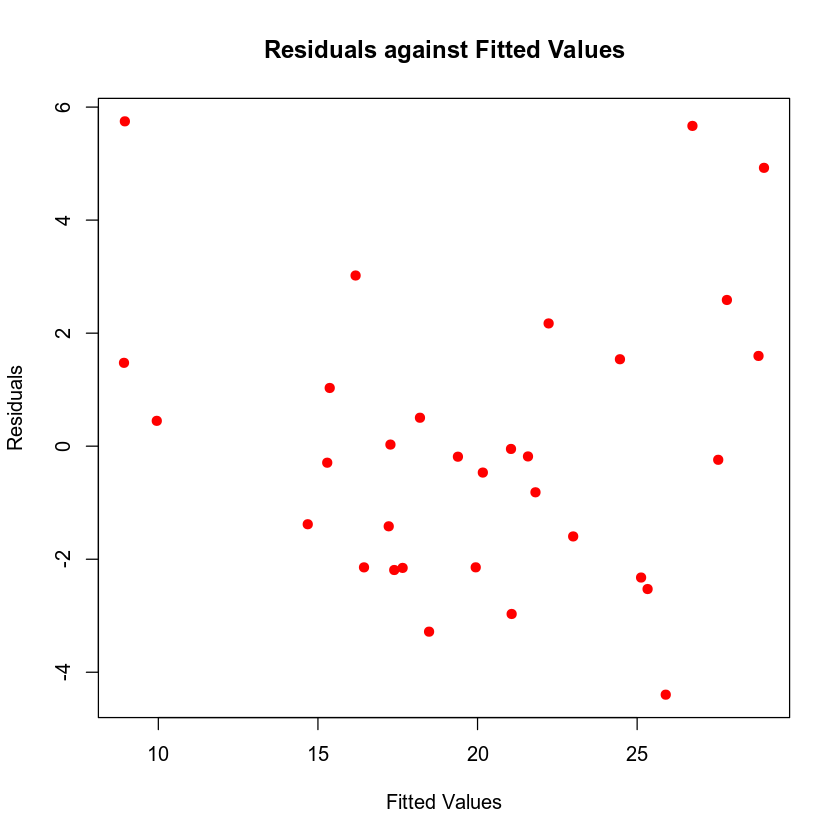

In [9]:
plot(fitted_values, residuals, 
     main = "Residuals against Fitted Values",
     xlab = "Fitted Values", ylab = "Residuals",
     col="red", 
     pch = 19)

## Step 10: Diagnostic Plots  &mdash; Q-Q Plot
In this step, you will generate a Q-Q plot to test assumptions of normality of the residuals.   

Click the block of code below and hit the **Run** button above.  
NOTE: If the plot is not created, click the code section and hit the **Run** button again.

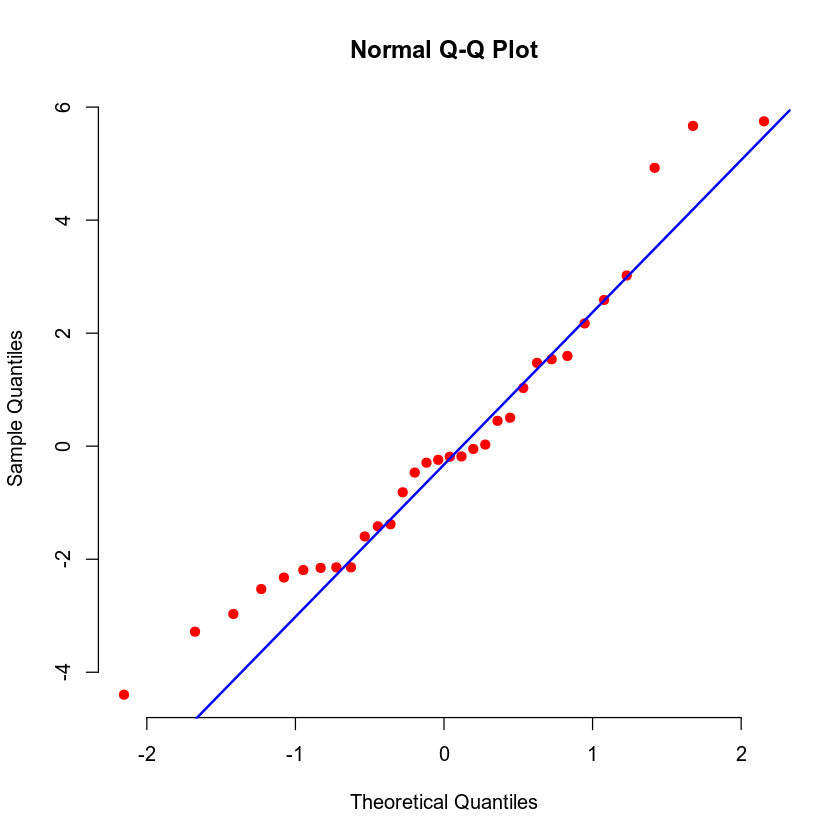

In [10]:
qqnorm(residuals, pch = 19, col="red", frame = FALSE)
qqline(residuals, col = "blue", lwd = 2)

## Step 11: Confidence Intervals for Parameter Estimates
In this step, you will use the **confint** function to create 90% confidence intervals for the beta parameter estimates.  

Click the block of code below and hit the **Run** button above.  

In [11]:
# confidence intervals for model parameters
print("confint")
conf_90_int <- confint(model, level=0.90) 
round(conf_90_int, 4)

[1] "confint"


,5 %,95 %
(Intercept),10.8223,28.6701
wt,-5.8704,-4.2256
qsec,0.4789,1.3795


## Step 12: Predictions, Prediction Interval, and Confidence Interval
In this step, you will predict the fuel economy for a car that has a weight of 3.88 and qsec of 22.74. You will also obtain a 90% prediction interval and confidence interval for this prediction. Note that this observation is not from the data set that was used to create this model. 

Click the block of code below and hit the **Run** button above.  

In [12]:
newdata <- data.frame(wt=3.88, qsec=22.74)

print("prediction interval")
prediction_pred_int <- predict(model, newdata, interval="predict", level=0.90) 
round(prediction_pred_int, 4)

print("confidence interval")
prediction_conf_int <- predict(model, newdata, interval="confidence", level=0.90) 
round(prediction_conf_int, 4)

[1] "prediction interval"


fit,lwr,upr
21.29,16.2269,26.3531


[1] "confidence interval"


fit,lwr,upr
21.29,18.8049,23.7751


## Your Code

You have been asked to create a regression model in the Module One Problem Set. Review the Problem Set Report template to see the questions you will be answering about your models.

Use the empty blocks below to write the R code for your model and get outputs. Then use the outputs to answer the questions in your Problem Set Report.

**Note: Use the + (plus) button to add new code blocks or the scissor icon to remove empty code blocks, if needed.**

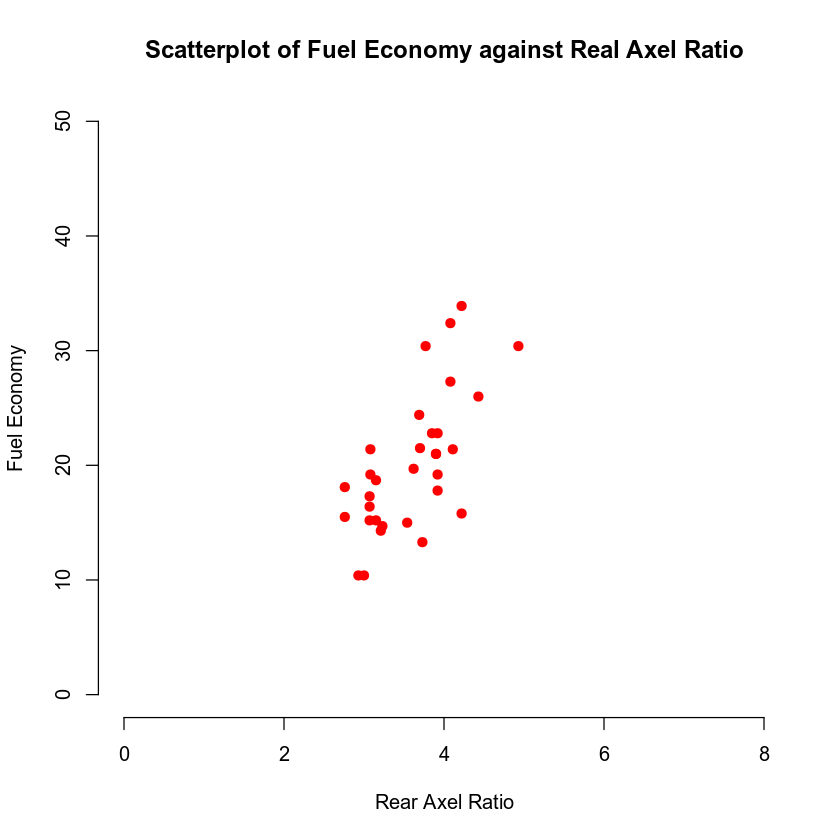

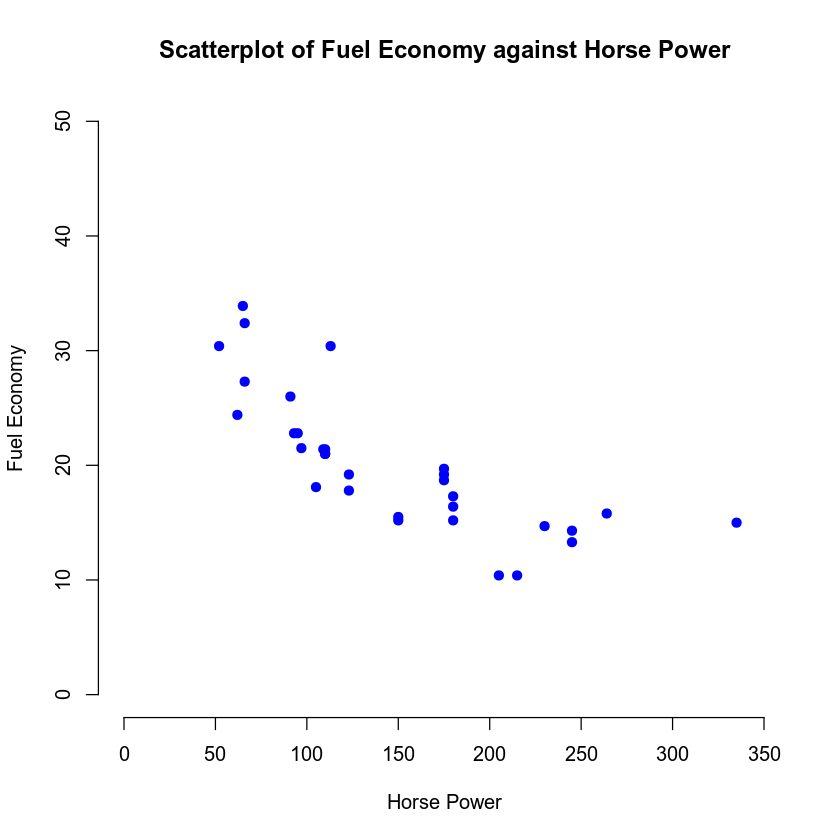

In [13]:
plot(mtcars2$drat, mtcars$mpg, 
     main = "Scatterplot of Fuel Economy against Real Axel Ratio",
     xlab = "Rear Axel Ratio", ylab = "Fuel Economy",
     xlim=c(0, 8),
     ylim=c(0, 50),
     col="red", 
     pch = 19, frame = FALSE)

plot(mtcars2$hp, mtcars$mpg, 
     main = "Scatterplot of Fuel Economy against Horse Power",
     xlab = "Horse Power", ylab = "Fuel Economy",
     xlim=c(0, 350),
     ylim=c(0, 50),
     col="blue", 
     pch = 19, frame = FALSE)



In [14]:
# Selecting mpg, drat, and hp variables to subset the data
mynewvars <- c("mpg","drat","hp")
mtcars_subset <- mtcars2[mynewvars]

# Print the first 10 rows
print("head")
head(mtcars_subset, 10)

# Print the correlation matrix
print("cor")
corr_matrix <- cor(mtcars_subset, method = "pearson")
round(corr_matrix, 4)

[1] "head"


mpg,drat,hp
<dbl>,<dbl>,<int>
21.0,3.90,110
21.0,3.90,110
22.8,3.85,93
21.4,3.08,110
18.7,3.15,175
18.1,2.76,105
14.3,3.21,245
24.4,3.69,62
22.8,3.92,95


[1] "cor"


,mpg,drat,hp
mpg,1.0000,0.6812,-0.7762
drat,0.6812,1.0000,-0.4488
hp,-0.7762,-0.4488,1.0000


In [15]:
# Create the multiple regression model and print the statistics
model2 <- lm(mpg ~ drat + hp, data=mtcars_subset)
summary(model2)


Call:
lm(formula = mpg ~ drat + hp, data = mtcars_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0369 -2.3487 -0.6034  1.1897  7.7500 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.789861   5.077752   2.125 0.042238 *  
drat         4.698158   1.191633   3.943 0.000467 ***
hp          -0.051787   0.009293  -5.573 5.17e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.17 on 29 degrees of freedom
Multiple R-squared:  0.7412,	Adjusted R-squared:  0.7233 
F-statistic: 41.52 on 2 and 29 DF,  p-value: 3.081e-09


In [16]:
fitted_values2 <- fitted.values(model2) 
fitted_values2

1        2        3        4        5        6        7        8 
23.41614 23.41614 24.06161 19.56366 16.52639 18.31918 13.18322 24.91529 
       9       10       11       12       13       14       15       16 
24.28691 22.83688 22.83688 15.89161 15.89161 15.89161 13.93920 13.75020 
      17       18       19       20       21       22       23       24 
14.05398 26.54043 31.25887 27.24995 23.14974 15.98878 17.82106 15.62626 
      25       26       27       28       29       30       31       32 
16.19752 26.54043 26.89011 22.65002 16.94441 18.73453 10.07281 24.45454

In [17]:
residuals2 <- residuals(model2)
residuals2

1          2          3          4          5          6          7 
-2.4161450 -2.4161450 -1.2616101  1.8363444  2.1736056 -0.2191784  1.1167817 
         8          9         10         11         12         13         14 
-0.5152911 -1.4869079 -3.6368817 -5.0368817  0.5083915  1.4083915 -0.6916085 
        15         16         17         18         19         20         21 
-3.5392002 -3.3502047  0.6460187  5.8595740 -0.8588732  6.6500453 -1.6497399 
        22         23         24         25         26         27         28 
-0.4887791 -2.6210606 -2.3262604  3.0024767  0.7595740 -0.8901149  7.7499755 
        29         30         31         32 
-1.1444113  0.9654715  4.9271881 -3.0545448

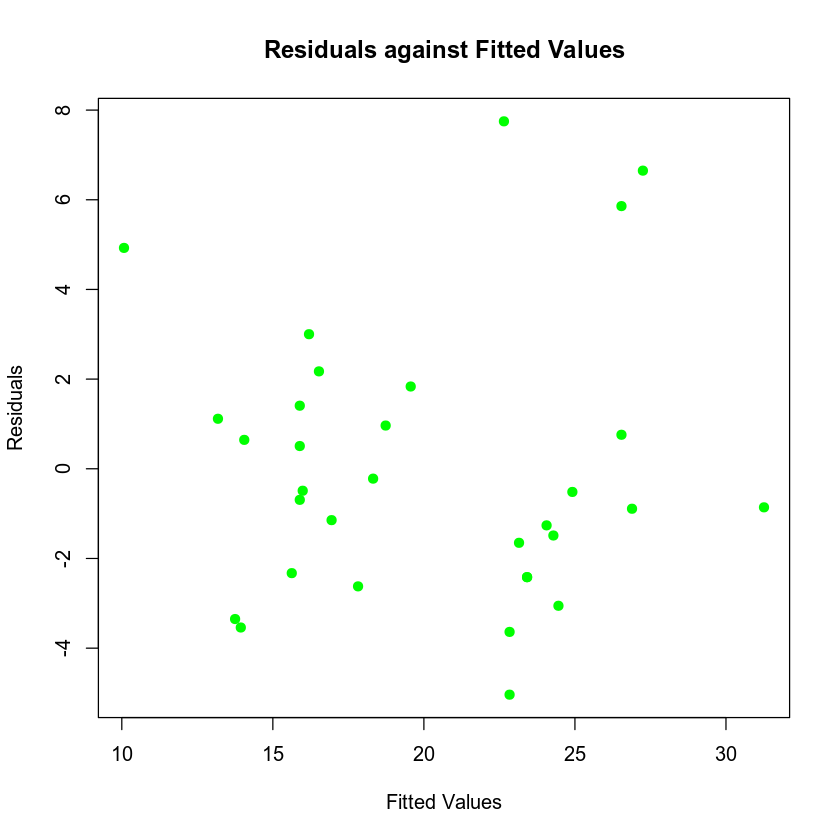

In [18]:
plot(fitted_values2, residuals2, 
     main = "Residuals against Fitted Values",
     xlab = "Fitted Values", ylab = "Residuals",
     col="green", 
     pch = 19)

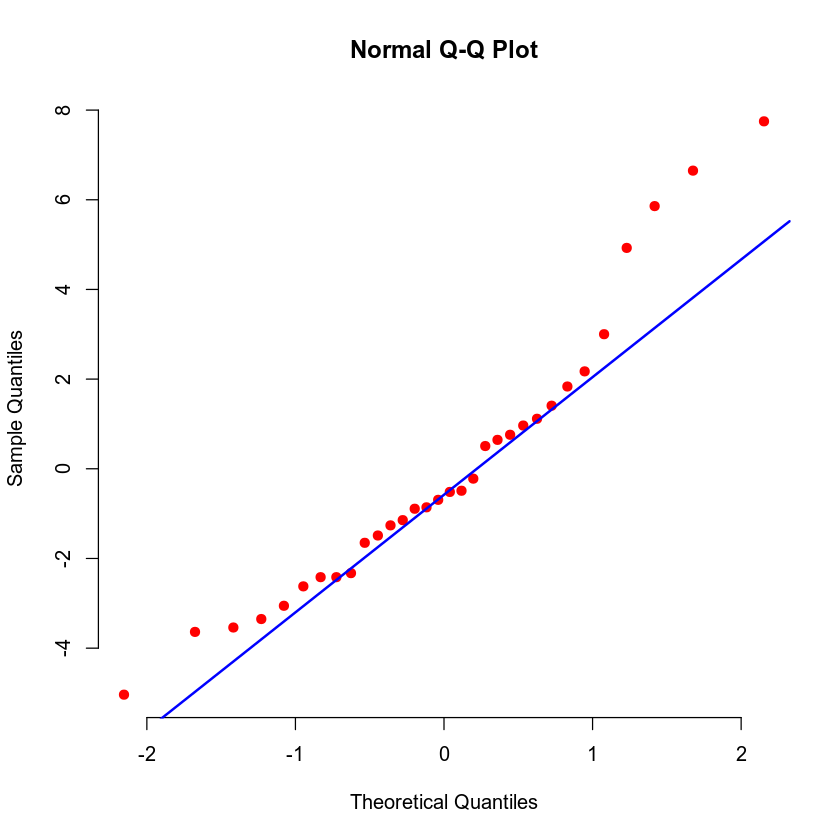

In [19]:
qqnorm(residuals2, pch = 19, col="red", frame = FALSE)
qqline(residuals2, col = "blue", lwd = 2)

In [20]:
newdata2 <- data.frame(drat=3.15, hp=120)

print("prediction interval")
prediction_pred_int <- predict(model2, newdata2, interval="predict", level=0.95) 
round(prediction_pred_int, 4)

print("confidence interval")
prediction_conf_int <- predict(model2, newdata2, interval="confidence", level=0.95) 
round(prediction_conf_int, 4)

[1] "prediction interval"


fit,lwr,upr
19.3747,12.6449,26.1045


[1] "confidence interval"


fit,lwr,upr
19.3747,17.5716,21.1777


In [21]:
# confidence intervals for model parameters
print("confint")
conf_95_int <- confint(model2, level=0.90) 
round(conf_95_int, 4)

[1] "confint"


,5 %,95 %
(Intercept),2.1621,19.4176
drat,2.6734,6.7229
hp,-0.0676,-0.0360


In [22]:
aov.model = aov(mpg ~ drat + hp, data = mtcars)
summary(aov.model)

            Df Sum Sq Mean Sq F value   Pr(>F)    
drat         1  522.5   522.5   51.99 6.14e-08 ***
hp           1  312.1   312.1   31.06 5.17e-06 ***
Residuals   29  291.5    10.1                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## End of Module One Jupyter Notebook
Attach the HTML output along with your problem set report for the Module One Problem Set. The HTML output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Be sure to answer all of the questions in your problem set report.